In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'retina'  

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
boston = load_boston()

In [5]:
type(boston)

sklearn.utils.Bunch

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
boston.feature_names # let's see the feature names of Boston

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# As we see MEDV is not in the feature names, it is the target variable 
boston.target


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:

data = boston.data
type(data)


numpy.ndarray

In [11]:
data.shape

(506, 13)

In [12]:

# As the data is on array form let's convert it into data frame 
df = pd.DataFrame( data = data, columns = boston.feature_names)


In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:

# there is no price column in it, so we will add it 


In [15]:
df['Price'] = boston.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:

df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:

df.isnull().sum()
# let's check the null values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Data Visualization

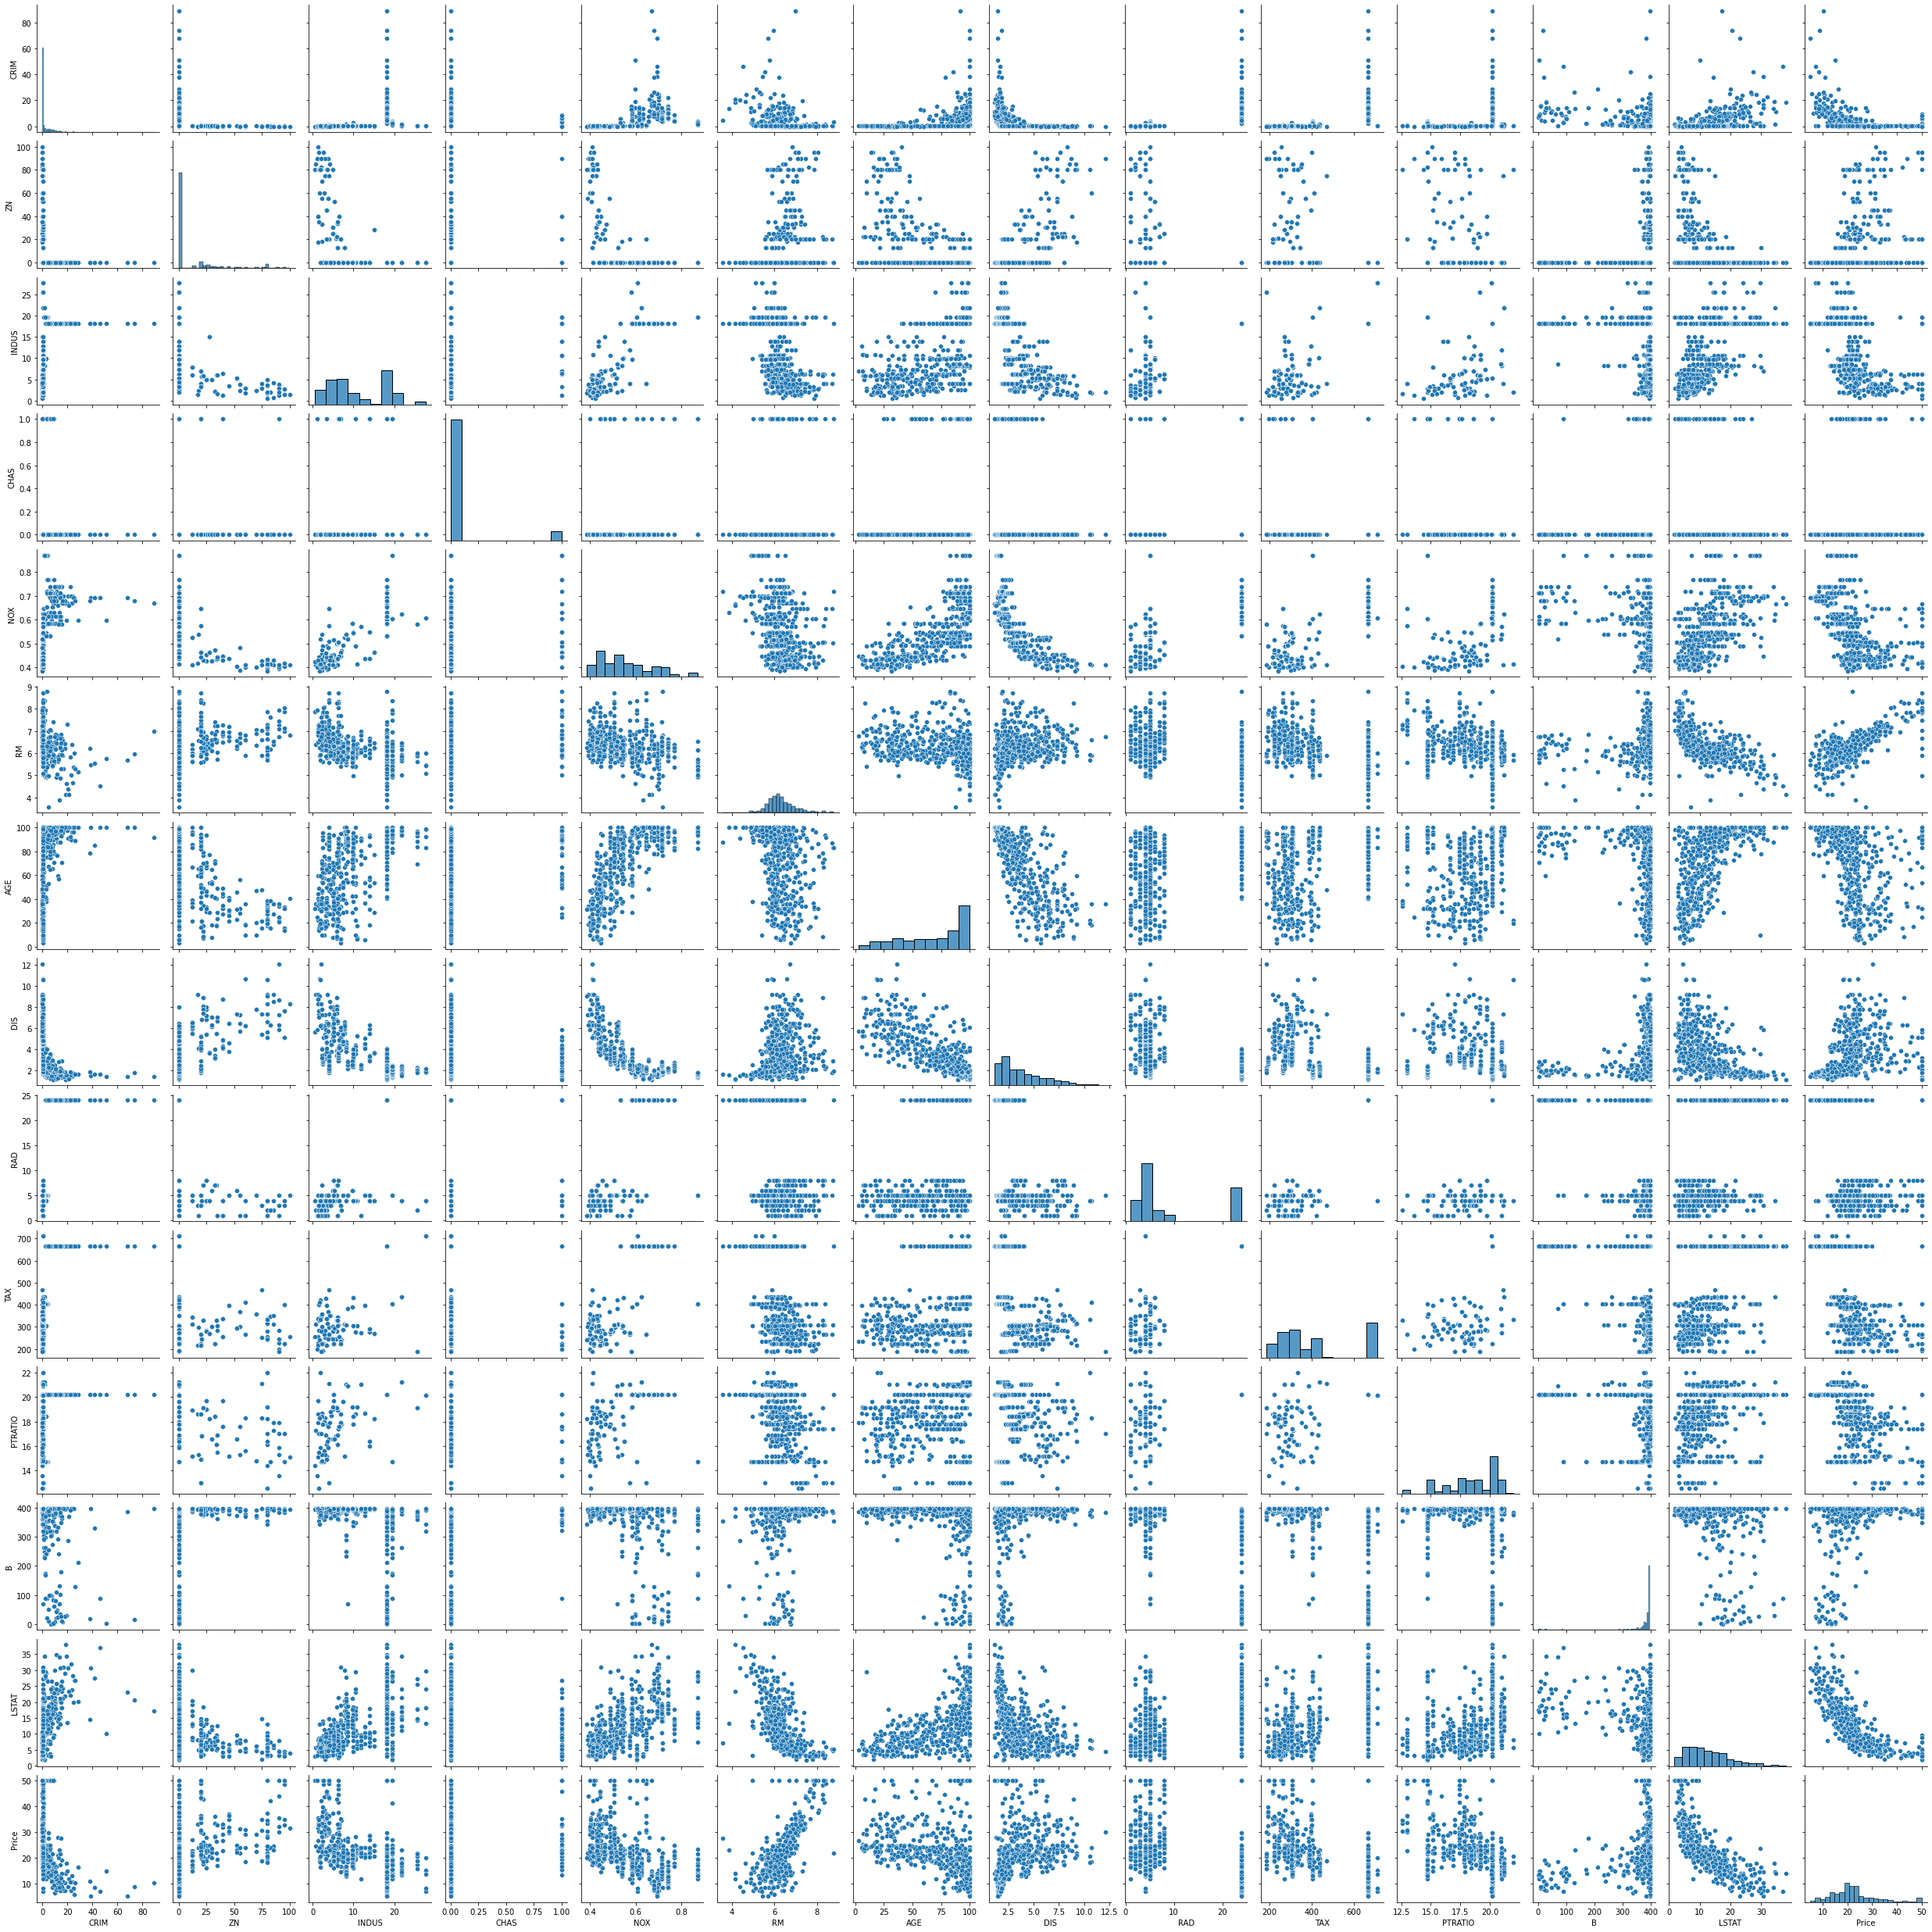

In [19]:
sns.pairplot(df)

#### As we see some features are highly co related and some are very concentrated, we will check their distribution as well

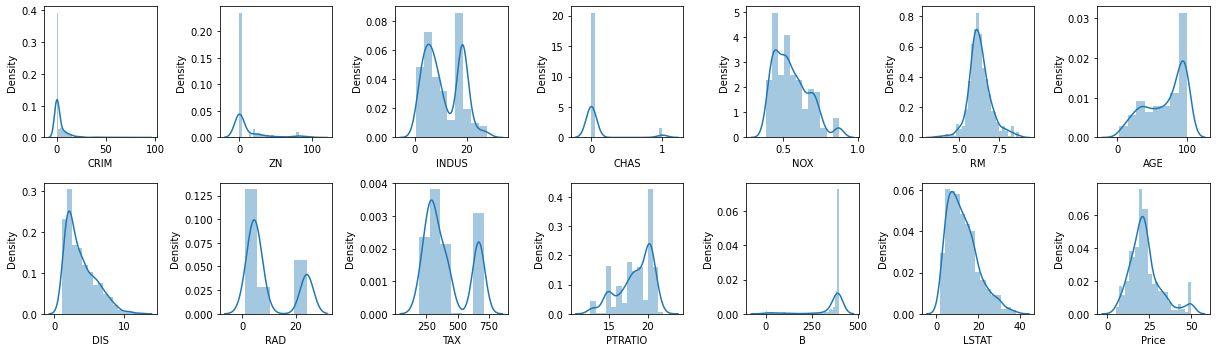

In [21]:

rows = 2
cols = 7 

fig, axis = plt.subplots( nrows = rows, ncols = cols, figsize = (17,5))
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = axis[i][j])
        index = 1 + index

        plt.tight_layout()

In [21]:
cm = df.corr()

In [22]:
cm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

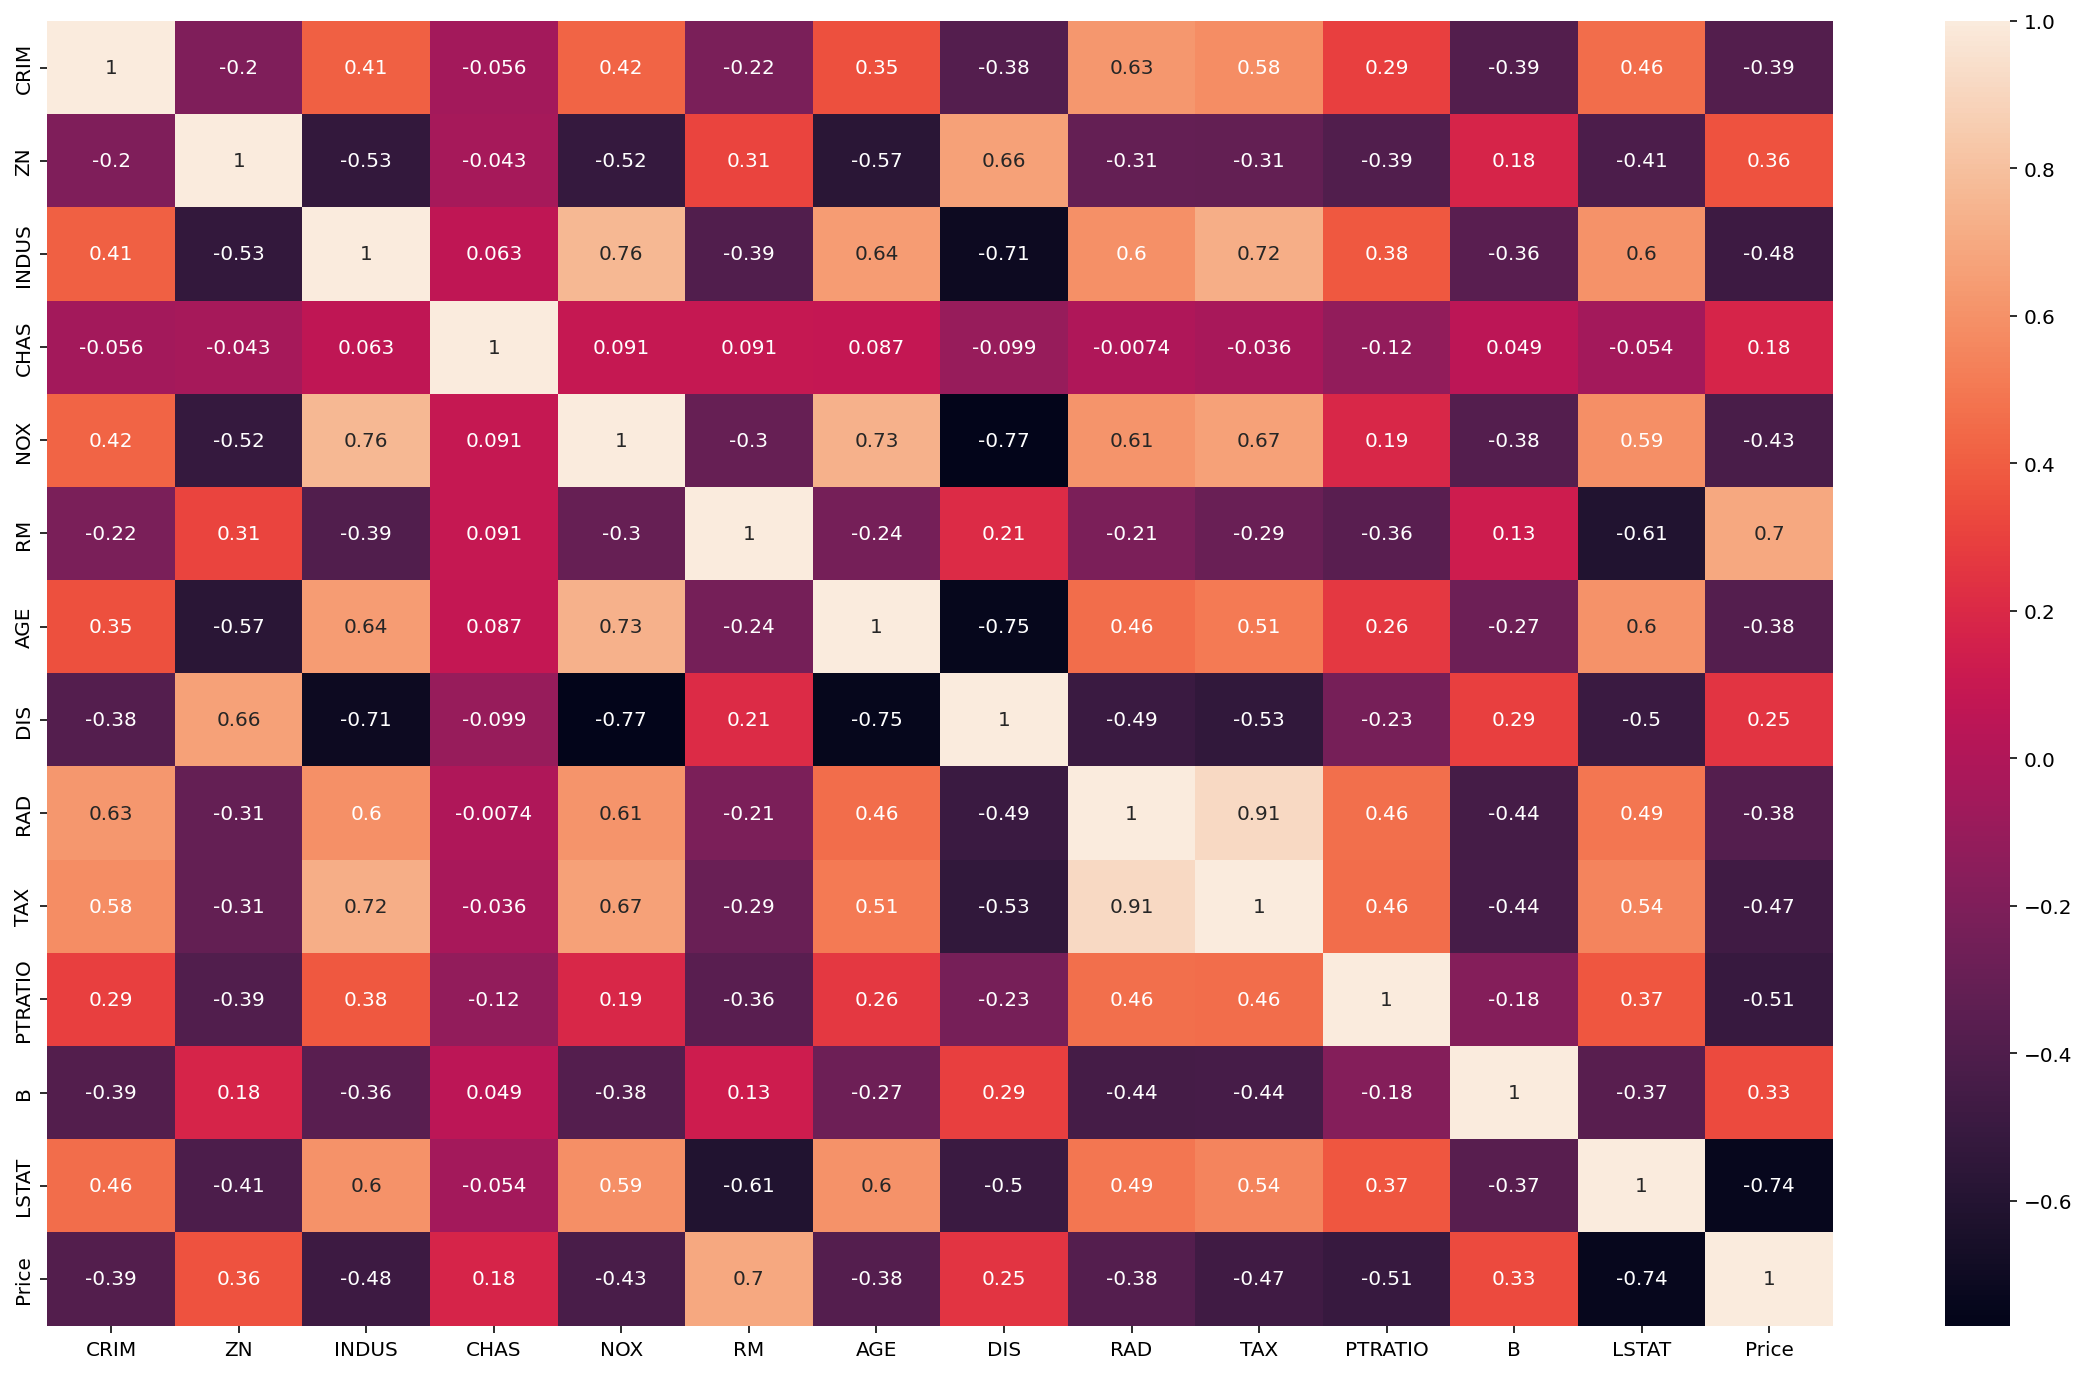

In [23]:
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(cm, annot = True, annot_kws = {'size':10})

#### Let's make a function to select the features

In [24]:
cm.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [25]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns  = ['Corr Value'])
    return df

In [26]:
threshold = 0.50
corr_value = getCorrelatedFeature(cm['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [27]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [28]:
correlated_data = df[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


## Pairplot and Co-Relation Matrix of Correlated Data

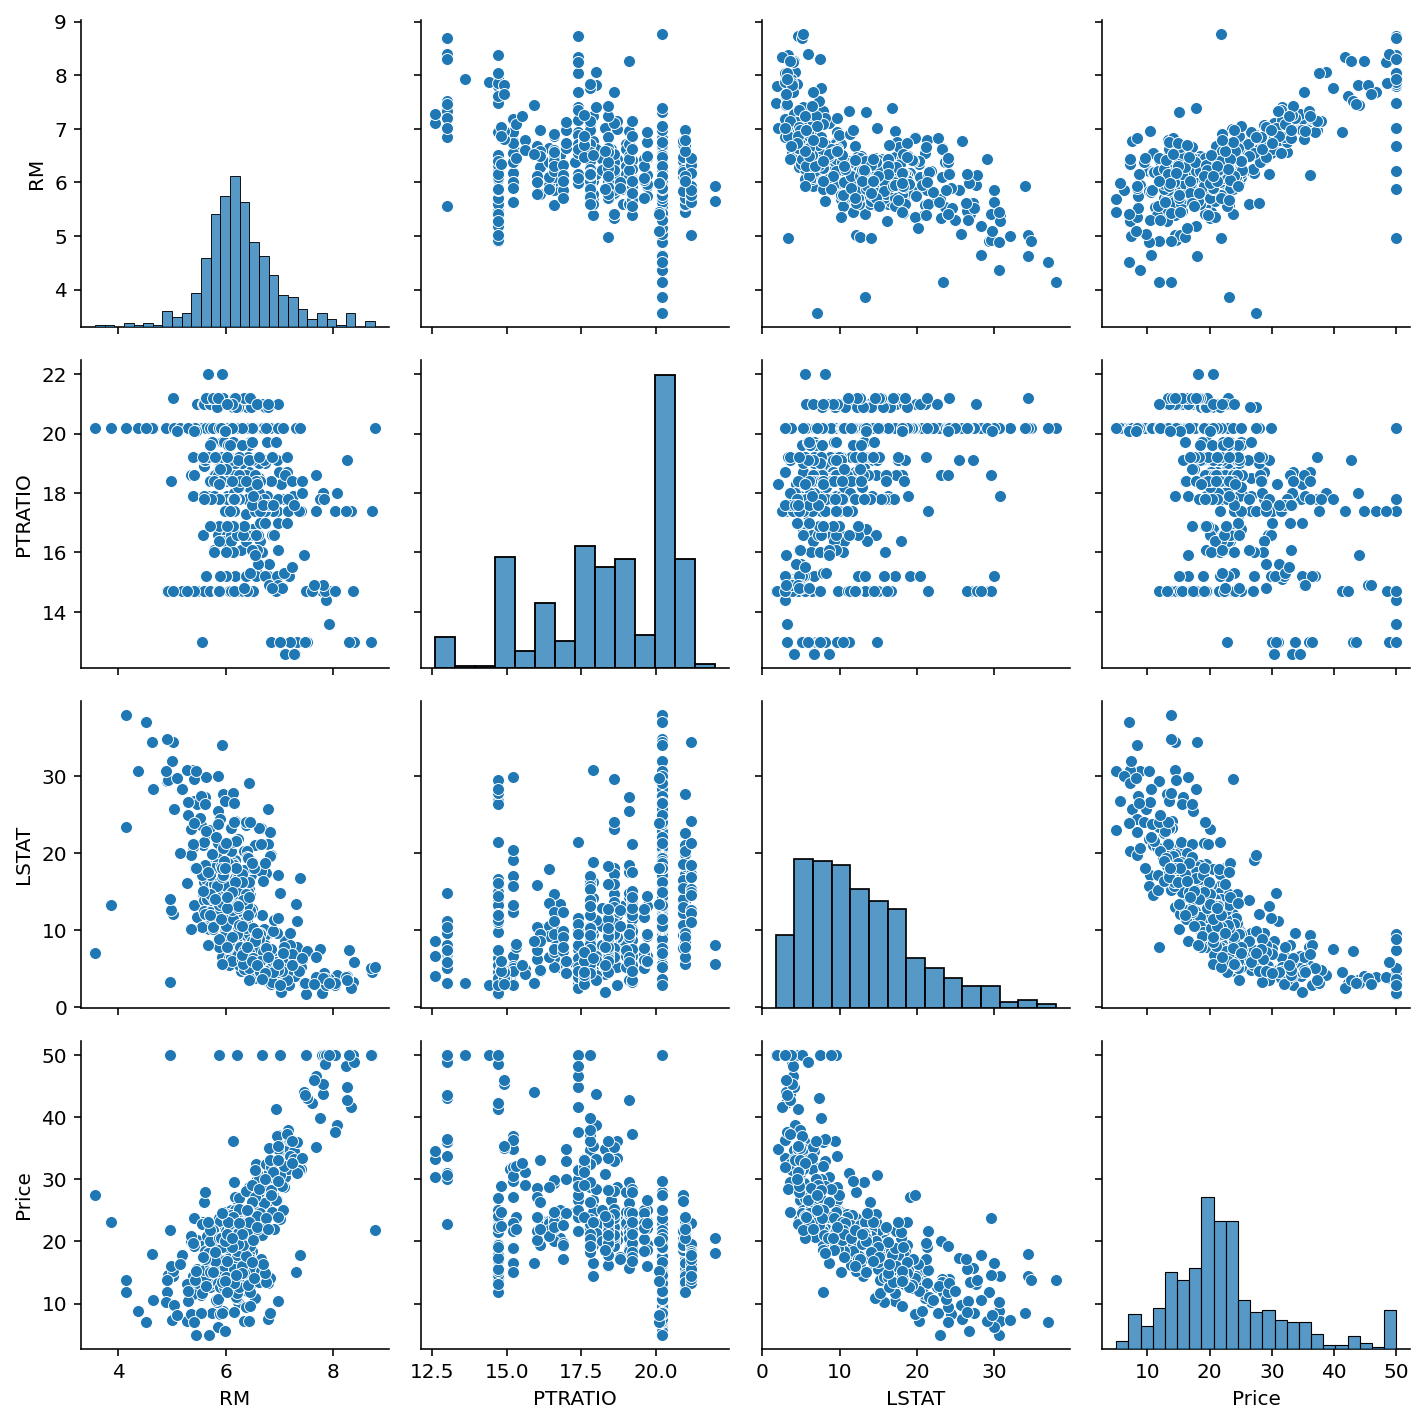

In [29]:
sns.pairplot(correlated_data)
plt.tight_layout()

<AxesSubplot:>

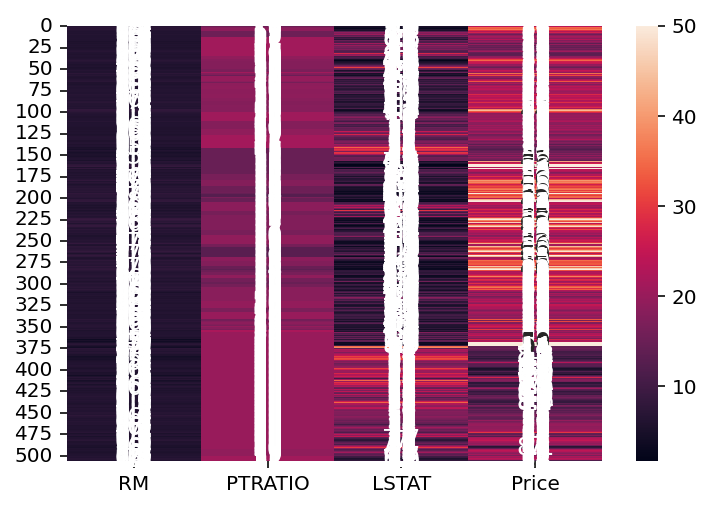

In [30]:
sns.heatmap(correlated_data, annot = True, annot_kws = {'size':12})

In [31]:
correlated_data.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [32]:
 correlated_data = pd.DataFrame(correlated_data)

<AxesSubplot:>

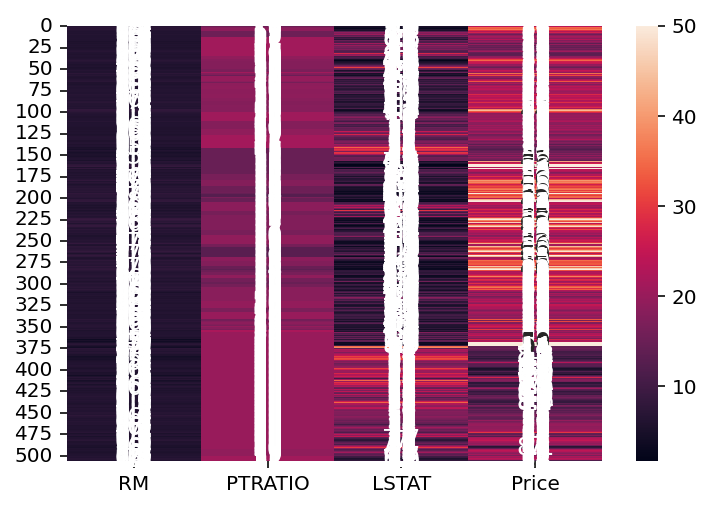

In [33]:
sns.heatmap(correlated_data, annot = True, annot_kws = {'size':12})

## Split and Train Data

In [34]:
x = correlated_data.drop( labels = ['Price'], axis = 1)
y = correlated_data['Price']

In [35]:
x.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [36]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [38]:
x_train.shape, x_test.shape

((404, 3), (102, 3))

## Let's Train our Model 

In [39]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [40]:
y_predict = lm.predict(x_test)

<AxesSubplot:xlabel='Price'>

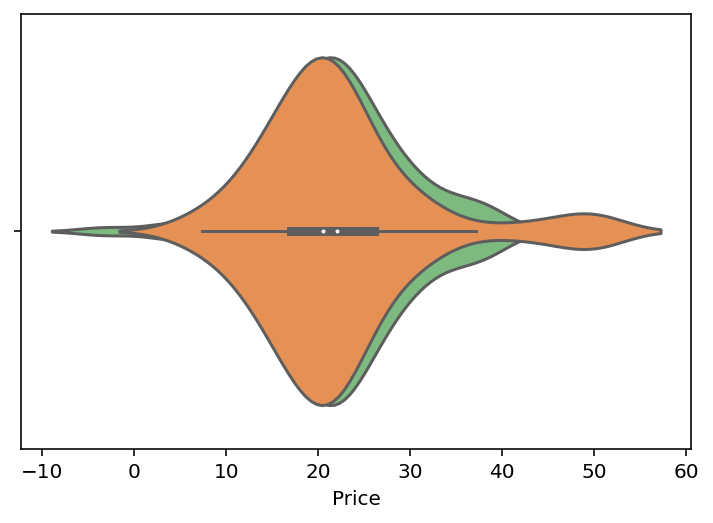

In [41]:
sns.violinplot(y_predict, palette = 'Greens')
sns.violinplot(y_test, palette = 'Oranges')

# by this we can see that we have almost same values 

In [42]:
df_1 = pd.DataFrame(data = [y_predict, y_test])
df_1.T

# By this we can acctually see the difference between pedicted and true value. predicted is 0 and true is 1

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


In [43]:
from sklearn.metrics import r2_score

In [44]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

print('R2 Score: ',score, )
print('Mean Absolute Error: ', mae)
print('Mean Squarred Error: ', mse)
print('Root Mean Squarred Error: ', rmse)

R2 Score:  0.48816420156925067
Mean Absolute Error:  4.404434993909257
Mean Squarred Error:  41.67799012221683
Root Mean Squarred Error:  6.4558492951909


## Store Feature Performance

In [45]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores= []
mae_value = []
mse_value = []
rmse_value = []

In [46]:
def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true,y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    total_features.append(len(features)-1) # -1 because price will also be selected and we do not want it
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    
    metrics_dataframe = pd.DataFrame(data = [total_features_name, total_features,selected_correlation_value,r2_scores, 
                                             mae_value, mse_value, rmse_value], index = ['Features Name', '#feature', 
                                                                                          'Corr Value', 'R2 Score', 'MAE', 'MSE', 'RMSE'])
    return metrics_dataframe.T 

In [47]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Features Name,#feature,Corr Value,R2 Score,MAE,MSE,RMSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799,6.455849


## Regression Plot of the features correlated with the house price

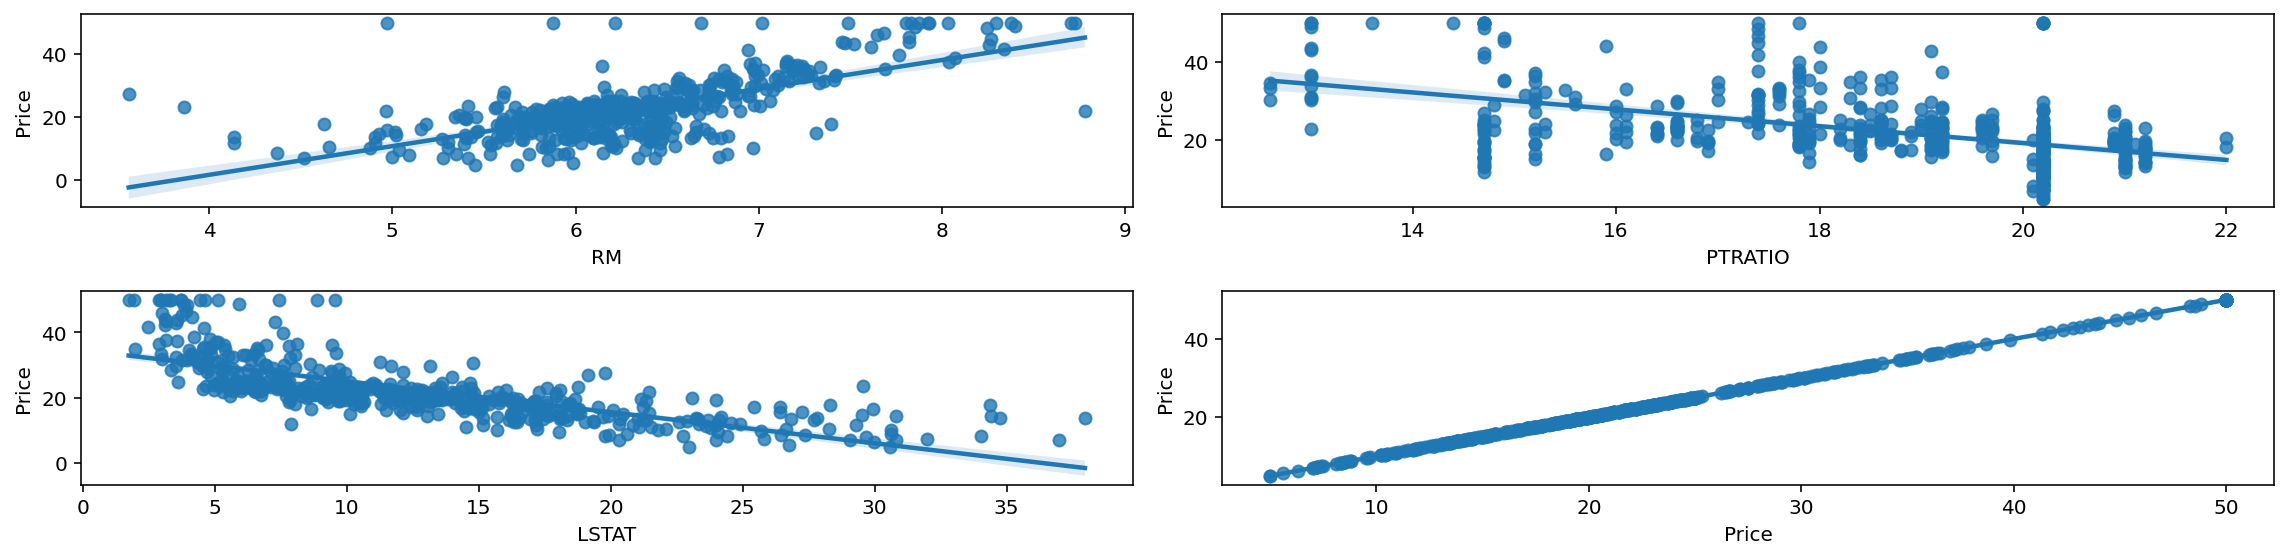

In [48]:
rows = 2
cols = 2

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4))
col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index+1
        

fig.tight_layout()

## Let's find out combination of columns to get better accuracy with >60%

In [49]:
cm['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [50]:
threshold = 0.60
corr_value = getCorrelatedFeature(cm['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [51]:
correlated_data = df[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [52]:
def get_y_predict(corr_data):
    x = corr_data.drop(labels = ['Price'], axis = 1)
    y = corr_data['Price']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0 )
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    y_predict = lm.predict(x_test)
    return y_predict

In [53]:
 y_predict = get_y_predict(correlated_data)

In [54]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Features Name,#feature,Corr Value,R2 Score,MAE,MSE,RMSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799,6.455849
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106,6.114173


## Let's find out other combination of columns to get better accuracy > 70%

In [55]:
cm['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [56]:
threshold = 0.70
corr_value = getCorrelatedFeature(cm['Price'], threshold)
corr_value

,Corr Value
LSTAT,-0.737663
Price,1.000000


In [57]:
correlated_data = df[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [58]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Features Name,#feature,Corr Value,R2 Score,MAE,MSE,RMSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799,6.455849
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106,6.114173
2,['LSTAT' 'Price'],1,0.7,0.430957,4.864011,46.336305,6.807078


#### We can see by removing RM our R2 score has decreased so we can not remove RM feature 

## Let's go ahead and select only RM feature 

In [59]:
correlated_data = df[['RM','Price']]
correlated_data.head()

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [60]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Features Name,#feature,Corr Value,R2 Score,MAE,MSE,RMSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799,6.455849
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106,6.114173
2,['LSTAT' 'Price'],1,0.7,0.430957,4.864011,46.336305,6.807078
3,['RM' 'Price'],1,0.7,0.423944,4.324741,46.907352,6.848894


## Now let's select the feature which has more than 0.40 co-related value 

In [61]:
threshold = 0.40
corr_value = getCorrelatedFeature(cm['Price'], threshold)
corr_value

,Corr Value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [62]:
correlated_data = df[corr_value.index]
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [63]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Features Name,#feature,Corr Value,R2 Score,MAE,MSE,RMSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799,6.455849
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106,6.114173
2,['LSTAT' 'Price'],1,0.7,0.430957,4.864011,46.336305,6.807078
3,['RM' 'Price'],1,0.7,0.423944,4.324741,46.907352,6.848894
4,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'P...,6,0.4,0.476203,4.394501,42.651942,6.530845


## Let's make a model on a normalized data 

In [64]:
lm = LinearRegression(normalize = True)
lm.fit(x_train, y_train)

LinearRegression(normalize=True)

In [65]:
y_predict = lm.predict(x_test) 
r2_score(y_test, y_predict)

0.4881642015692508

# Learning Curve

In [66]:
from sklearn.model_selection import learning_curve